### Agenda
* Import libraries and data
* Data exploration
* Data cleaning
* Data visualization
* One-hot encoding
* Split train-test dataset
* Models
  * Logistic Regression
  * Decision Tree Classifier
  * Random Forest Classifier
* Models accuracies
* Confusion matrices
* Conclusion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv("HRanalytics.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Cleaning

In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
print("Number of duplicates:",len(df[df.duplicated()]))

Number of duplicates: 3008


In [7]:
df = df.drop_duplicates()
print("Number of duplicates:",len(df[df.duplicated()]))

Number of duplicates: 0


### Data Visualization

<AxesSubplot:>

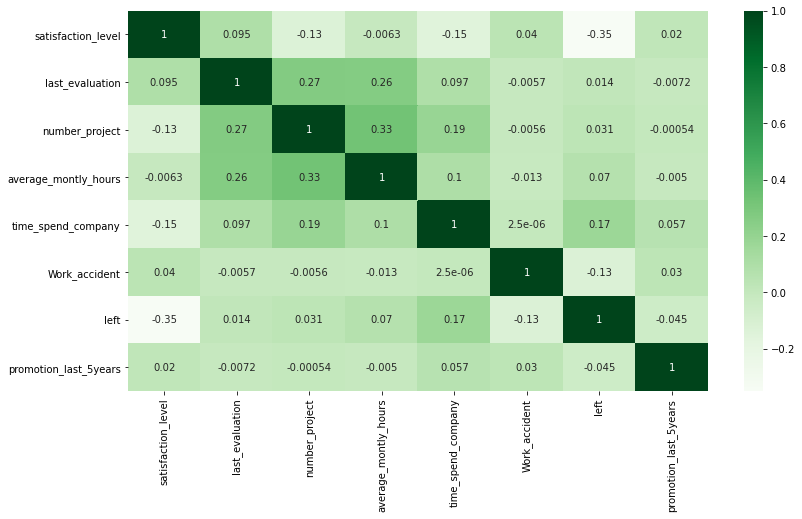

In [8]:
# check for multicollinearity

plt.figure(figsize = (13, 7))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

In [9]:
df.drop(['Work_accident'], axis='columns', inplace=True)

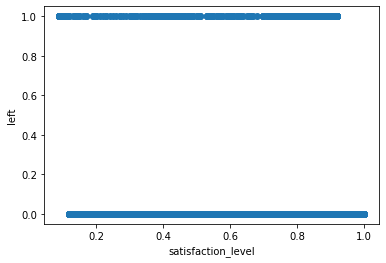

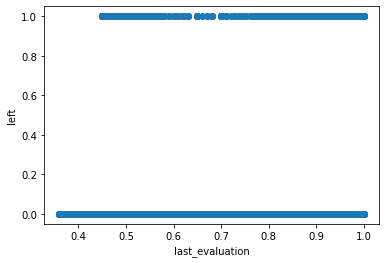

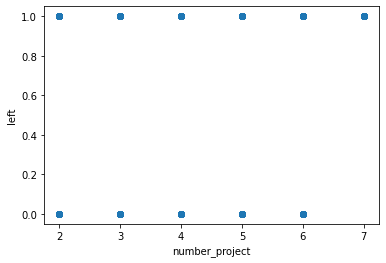

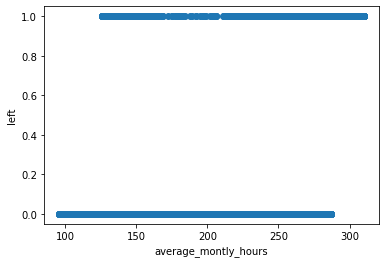

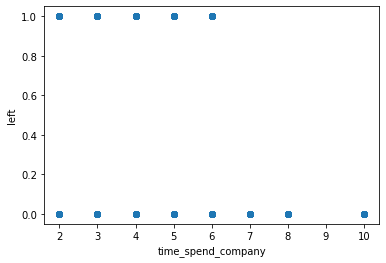

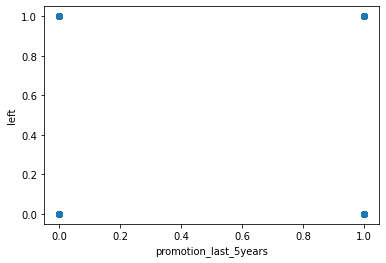

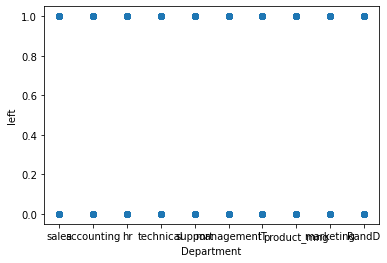

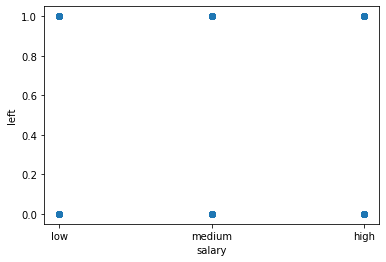

In [10]:
# binary logistic regression requires the dependent variable to be binary

for i in df.drop('left',axis='columns').columns:
    plt.figure(figsize=(6,4))
    plt.xlabel(i)
    plt.ylabel('left')
    plt.scatter(df[i],df['left'])

### One hot encoding

In [11]:
# since our data include text information we will use one hot encoding method
# using pandas to create dummy variables

dep_dummy= pd.get_dummies(df.Department)
sal_dummy= pd.get_dummies(df.salary)
new_df= pd.concat([df,dep_dummy,sal_dummy],axis='columns')
new_df.drop(['Department','salary'], axis='columns', inplace=True)

In [12]:
# when you can derive one variable from other variables, they are known to be multi-colinear
# in this situation linear regression won't work as expected, hence we need to drop one column

new_df.drop(['support','low'],axis='columns',inplace=True)
new_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,technical,high,medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,0,1,0,0,0,0,1,0,0,0,0,1,0
11996,0.74,0.95,5,266,10,0,1,0,0,0,0,1,0,0,0,0,1,0
11997,0.85,0.54,3,185,10,0,1,0,0,0,0,1,0,0,0,0,1,0
11998,0.33,0.65,3,172,10,0,1,0,0,0,0,0,1,0,0,0,1,0


In [13]:
X= new_df.drop(['left'],axis='columns')
y= new_df.left

sc = StandardScaler()
X = sc.fit_transform(X)

### Model training

In [14]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state = 42)

In [15]:
accuracy = {}

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
}

for i in models.keys():
    
    models[i].fit(X_train, y_train)
    accuracy[i] = models[i].score(X_test, y_test)

In [16]:
data_models = pd.DataFrame(index=models.keys(), columns=['Accuracy'])
data_models['Accuracy'] = accuracy.values()
data_models

,Accuracy
Logistic Regression,0.828679
Decision Tree,0.962901
Random Forest Classifier,0.979575


<AxesSubplot:>

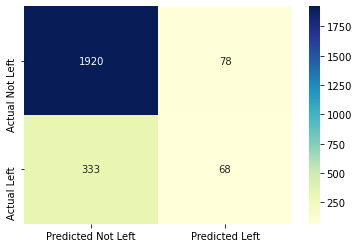

In [17]:
# confusion matrix for Logistic Regression

cm = confusion_matrix(y_test, models['Logistic Regression'].predict(X_test))
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted Not Left', 'Predicted Left'], index = ['Actual Not Left', 'Actual Left'])
sns.heatmap(conf_mat, annot = True, fmt='d', cmap="YlGnBu")

<AxesSubplot:>

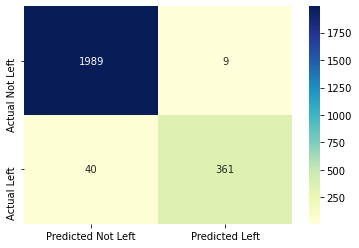

In [18]:
# confusion matrix for Random Forest Classifier

cm = confusion_matrix(y_test, models['Random Forest Classifier'].predict(X_test))
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted Not Left', 'Predicted Left'], index = ['Actual Not Left', 'Actual Left'])
sns.heatmap(conf_mat, annot = True, fmt='d', cmap="YlGnBu")

### Conclusion